<a href="https://colab.research.google.com/github/Jose-Gabriel-Rodriguez/MachineLearning/blob/main/Unidad2/3_Arboles_Regresion_Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://github.com/JoseGabriel-ITD/Probabilidad-y-Estadistica/blob/main/Cintilla2004.png?raw=true)

# **Machine Learning y Deep Learning**

## Unidad 2

### Practica 3: **Árboles de Regresión**

### Facilitador: *Dr. José Gabriel Rodríguez Rivas*

### Alumno:  _____________

**Regresión Lineal**:

- Ajusta una ecuación lineal (una recta o hiperplano) a los datos.

- Supone una relación lineal entre las variables.

- Fácil de interpretar, pero limitada si los datos tienen relaciones no lineales.


**Árboles de Regresión**:

- Divide los datos en regiones utilizando condiciones basadas en los valores de las variables.

- No requiere suposiciones de linealidad.

- Puede capturar relaciones no lineales y efectos de interacción entre variables.

- Puede sobreajustar si no se controla la profundidad


**Resumen**:

- La regresión lineal es más simple y adecuada si la relación es aproximadamente lineal.

- Los árboles de regresión son más flexibles pero menos interpretables.



## **1. Cargar datos y librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
df = pd.read_csv("autos2.csv")

# Mostrar las primeras filas
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas,fuel-type-map,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,13495.0,11.190476,1,False,True,1,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,16500.0,11.190476,1,False,True,1,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,9.038462,16500.0,12.368421,1,False,True,1,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,7.833333,13950.0,9.791667,1,False,True,1,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,18,10.681818,17450.0,13.055556,1,False,True,1,Low


## **2. Definir variables predictoras y variable objetivo**

In [2]:
X = df[['horsepower', 'engine-size', 'city-mpg', 'wheel-base', 'bore']]
y = df['price']


## **3. Dividir en conjunto de entrenamiento y prueba**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **4. Entrenar árbol de regresión**

In [14]:
tree_model = DecisionTreeRegressor(random_state=42, max_depth=4)
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=4, random_state=42)

## **5. Evaluar el modelo**

In [15]:
y_pred_tree = tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Error cuadrático medio (MSE): {mse_tree:.2f}")
print(f"Coeficiente de determinación (R²): {r2_tree:.2f}")


Error cuadrático medio (MSE): 9188294.38
Coeficiente de determinación (R²): 0.92


In [16]:
import numpy as np
# Calcular el RMSE (mas facil de interpretar que el MSE)
rmse = np.sqrt(mse_tree)
print(rmse)  # Aproximadamente 3,031

3031.219949198344


## **Diagrama de cajas y bigotes (boxplot)**

* Realizamos un Diagrama de tipo boxplot  para visualizar el rango de precios e interpretar mejor los resultados.
* No es necesario realizarlo, pero, lo anexamos con la finalidad de ver la distribucion o rango de los precios de los vehiculos.


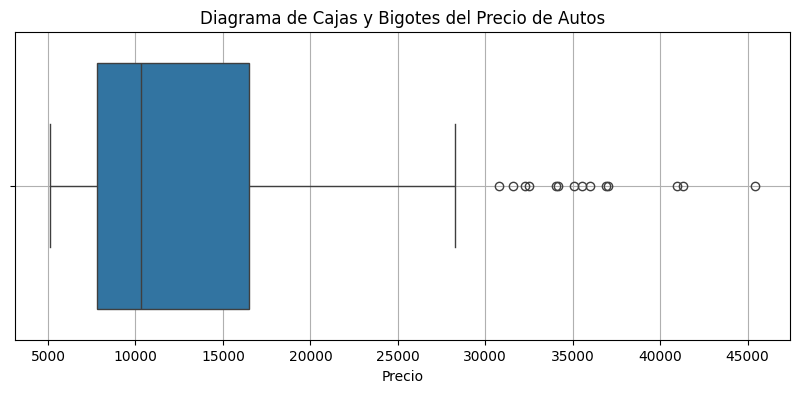

In [17]:
# Diagrama para visualizar el rango de precios e interpretar mejor los resultados
plt.figure(figsize=(10, 4))
sns.boxplot(x=df["price"])

plt.title("Diagrama de Cajas y Bigotes del Precio de Autos")
plt.xlabel("Precio")
plt.grid(True)
plt.show()

### **Interpretación:**

#### **1. Error Cuadrático Medio (MSE)**

RMSE ≈ $3,031 comparado con los precios reales
* Para autos cuyo precio ronda 8,000 a 16,000 (la mayoría), un error promedio de 3,000 representa:
* * ≈ **18% a 38% de error relativo**, lo cual puede **considerarse moderado a alto** dependiendo del uso del modelo (comercial vs analítico).
* Para autos caros (> 30,000), este error representa menos del 10%, por lo tanto es más aceptable.

#### **2. Coeficiente de Determinación (R² = 0.92)**

El R² mide **qué proporción de la variación en la variable dependiente (`precio`) puede ser explicada por el modelo**.

* R² = **0.92** significa que **el 92% de la variabilidad en los precios** se puede explicar a partir de las variables predictoras que se usaron (`horsepower`, `engine-size`, etc.).
* Es un excelente resultado, ya que un **R² cercano a 1 indica que el modelo se ajusta muy bien a los datos**.
Aunque el RMSE pueda parecer alto para autos baratos, el modelo logra explicar el 92% de la varianza total. Eso indica que:
* El modelo captura muy bien las tendencias generales de cómo varían los precios en función de las variables.
* Aun así, puede que no sea tan preciso para los autos de gama baja/media, especialmente si hay pocos datos de esos rangos o si la relación entre variables es más compleja ahí.

## 6. Comparar precios reales vs predichos

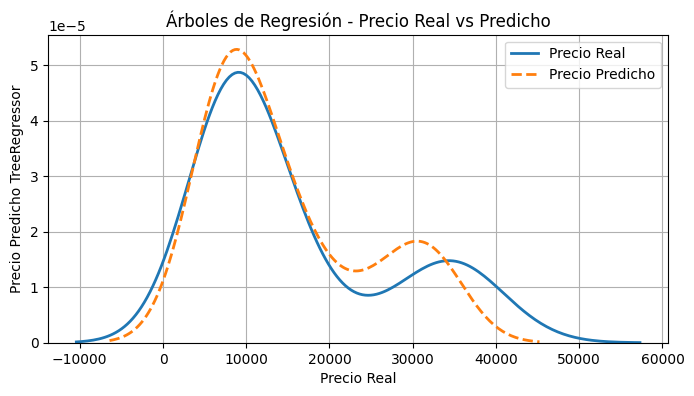

In [8]:
# Comparación visual de distribuciones
plt.figure(figsize=(8, 4))

sns.kdeplot(y_test, label='Precio Real', linewidth=2)
sns.kdeplot(y_pred_tree, label='Precio Predicho', linewidth=2, linestyle='--')

plt.title('Árboles de Regresión - Precio Real vs Predicho')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho TreeRegressor')
plt.legend()
plt.grid(True)
plt.show()

## **Impresion del Árbol de decision**
* Con el método **plot_tree**, desplegamos el arbol de decisiones que tomo el algoritmo para predecir los precios.
* sirve para visualizar:
  * Qué variables se usan para tomar decisiones.
  * En qué orden se aplican los criterios.
  * Cuáles son los valores umbral que separan las clases o predicciones.


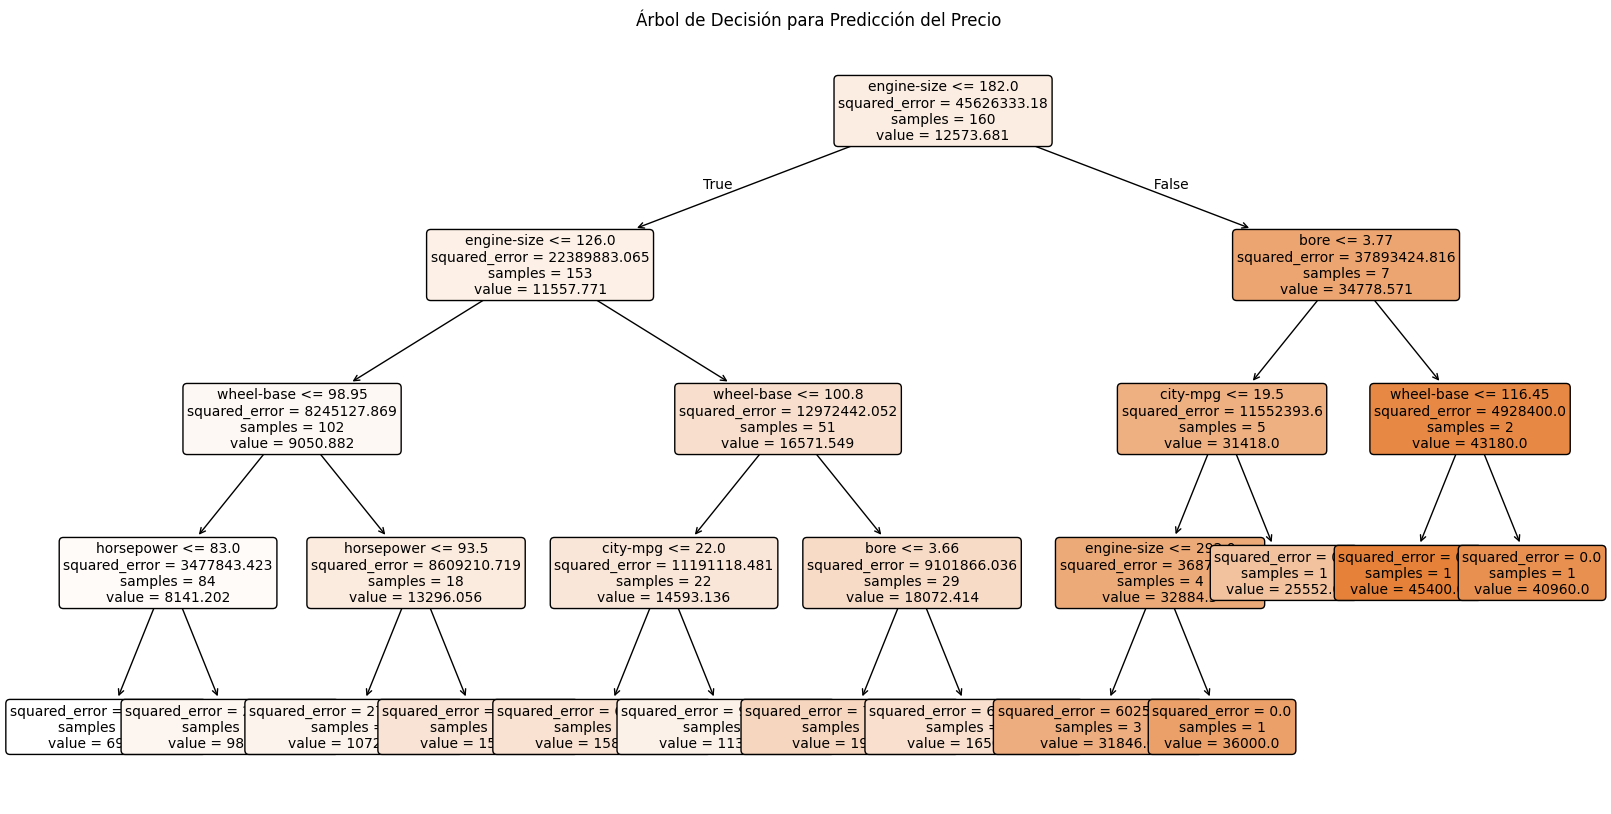

In [9]:
from sklearn.tree import plot_tree

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(tree_model,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Árbol de Decisión para Predicción del Precio")
plt.show()

# **¿Qué muestra el árbol?**

**Cada nodo del árbol contiene:**

* Condición de división (por ejemplo, engine-size <= 126.0)
* Error cuadrático medio dentro del nodo (squared_error)
* Número de muestras que caen en ese nodo (samples)
* Valor promedio predicho para el precio de esas muestras (value)

El árbol empieza en la raíz (parte superior) y divide sucesivamente los datos según las variables predictoras más influyentes.

#### **Nivel 1 (raíz del árbol):**
* **engine-size <= 126.0**
* Esta es la primera decisión clave del modelo.
* Divide el conjunto de datos en dos ramas:
* Si el tamaño del motor es menor o igual a 126.0 → izquierda.
* Si es mayor → derecha.
* El valor promedio en esta raíz es $11,557.77, basado en 153 muestras.

#### **Nivel 2 (rama izquierda: motor pequeño o mediano)**
* **wheel-base <= 98.95**
* Segundo criterio: si la distancia entre ejes es ≤ 98.95, baja a la izquierda; si es mayor, a la derecha.
* *Por ejemplo:* Si el auto tiene motor pequeño y chasis corto, el modelo lo asocia con un precio más bajo.

#### **Nivel 2 (rama derecha: motor grande)**
**engine-size <= 182.0**
* Otra división del tamaño del motor, refinando los autos con motores grandes.
* Más adelante, usa variables como bore (diámetro del cilindro), city-mpg y wheel-base para predecir.

#### **Colores del árbol**
* Los nodos más oscuros indican precios más altos.
* Esto te permite ver visualmente cómo el modelo asocia ciertas combinaciones de variables con autos más caros o baratos.

**El árbol de regresión toma decisiones jerárquicas** basadas en las variables más relevantes para predecir el precio del automóvil. En este caso, el tamaño del motor (engine-size) es la primera división, lo cual indica que es la variable más influyente.

A partir de ahí, el modelo divide por otras variables como la distancia entre ejes (wheel-base), caballos de fuerza (horsepower) y consumo en ciudad (city-mpg), ajustando progresivamente el valor predicho.

**Cada hoja del árbol representa un subconjunto de vehículos con características similares** y un precio promedio estimado. Este enfoque no lineal permite capturar patrones complejos y segmentaciones claras del mercado automotriz.

# **Ajustes de parametros del arbol de decision**

* Modificamos el parametro a **max_depth=9** para ver si mejora o empeora la precision del modelo.


Error cuadrático medio (MSE): 7896468.85
Coeficiente de determinación (R²): 0.94
2810.065630492597


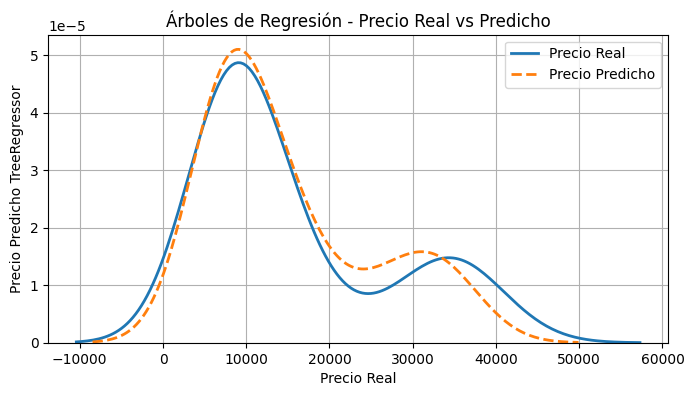

In [18]:
tree_model = DecisionTreeRegressor(random_state=42, max_depth=9)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Error cuadrático medio (MSE): {mse_tree:.2f}")
print(f"Coeficiente de determinación (R²): {r2_tree:.2f}")

# Calcular el RMSE (mas facil de interpretar que el MSE)
rmse = np.sqrt(mse_tree)
print(rmse)

# Comparación visual de distribuciones
plt.figure(figsize=(8, 4))

sns.kdeplot(y_test, label='Precio Real', linewidth=2)
sns.kdeplot(y_pred_tree, label='Precio Predicho', linewidth=2, linestyle='--')

plt.title('Árboles de Regresión - Precio Real vs Predicho')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho TreeRegressor')
plt.legend()
plt.grid(True)
plt.show()

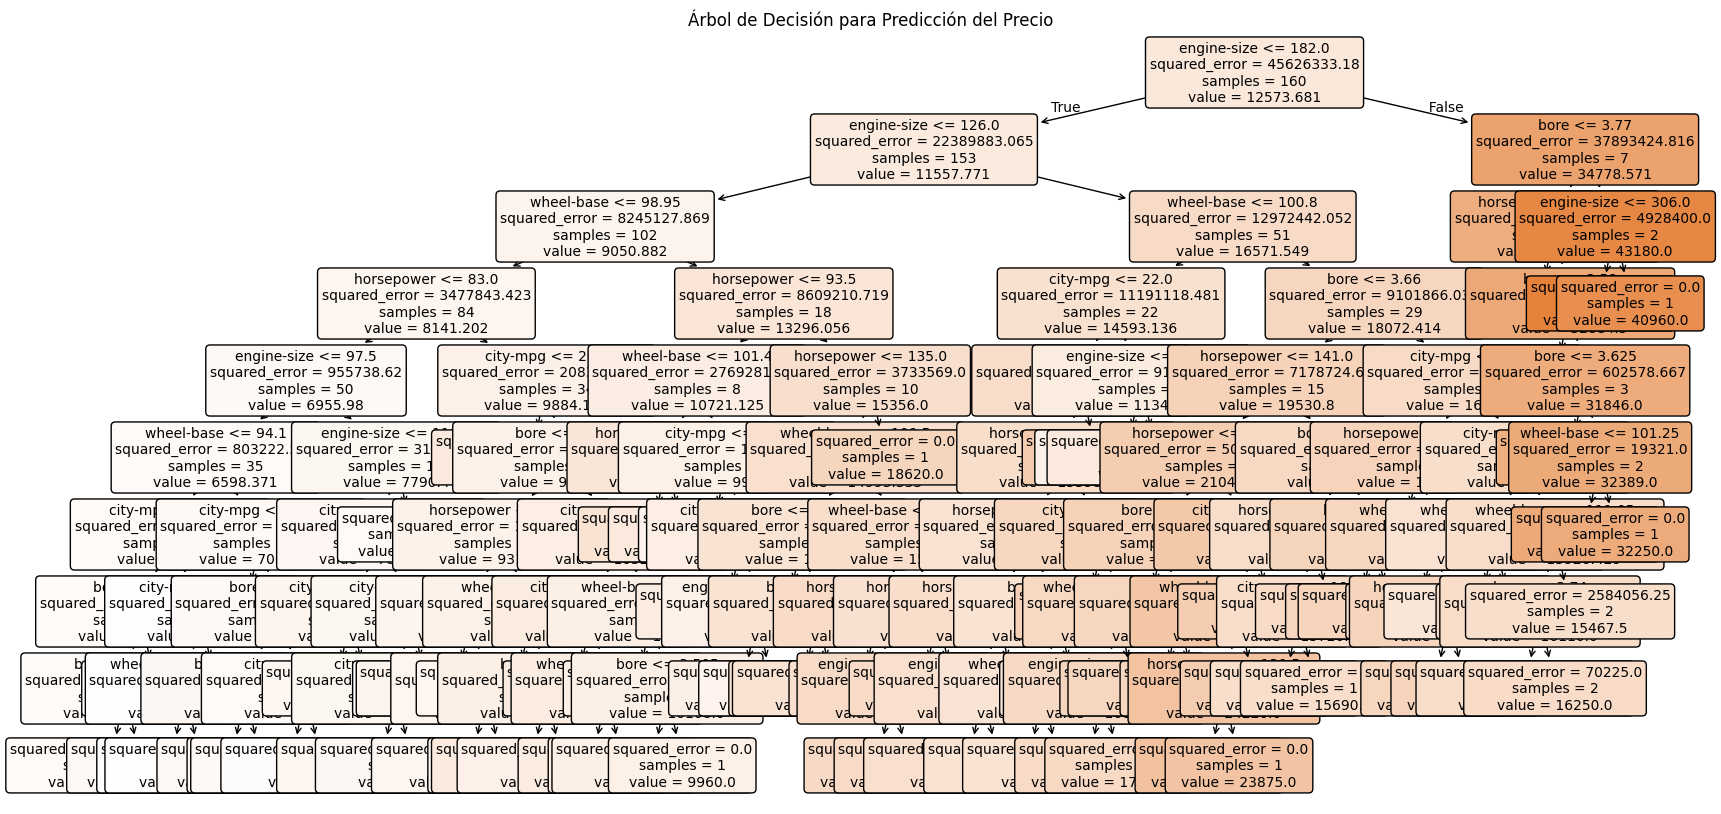

In [19]:
# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(tree_model,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Árbol de Decisión para Predicción del Precio")
plt.show()

# **Ajustes de parametros del arbol de decision**

* Modificamos el parametro a **max_depth=7** para ver si mejora o empeora la precision del modelo, además de otros parametros.

Error cuadrático medio (MSE): 6207944.08
Coeficiente de determinación (R²): 0.95
2491.5746191891626


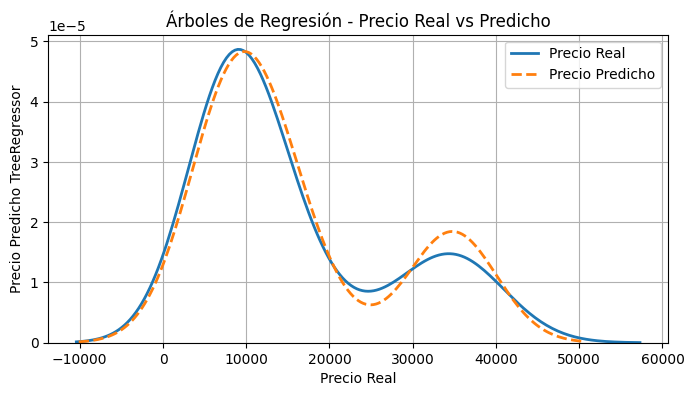

In [23]:
tree_model = DecisionTreeRegressor(
    random_state=42,
    max_depth=7,
    min_samples_split=10,  # Número mínimo de muestras requeridas para dividir un nodo.
    min_samples_leaf=2,   # Número mínimo de muestras que debe tener una hoja
    max_features='sqrt',  # Número máximo de características a considerar al dividir un nodo.
    max_leaf_nodes=20    # Número máximo de hojas en el árbol.
    )

tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Error cuadrático medio (MSE): {mse_tree:.2f}")
print(f"Coeficiente de determinación (R²): {r2_tree:.2f}")

# Calcular el RMSE (mas facil de interpretar que el MSE)
rmse = np.sqrt(mse_tree)
print(rmse)

# Comparación visual de distribuciones
plt.figure(figsize=(8, 4))

sns.kdeplot(y_test, label='Precio Real', linewidth=2)
sns.kdeplot(y_pred_tree, label='Precio Predicho', linewidth=2, linestyle='--')

plt.title('Árboles de Regresión - Precio Real vs Predicho')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho TreeRegressor')
plt.legend()
plt.grid(True)
plt.show()

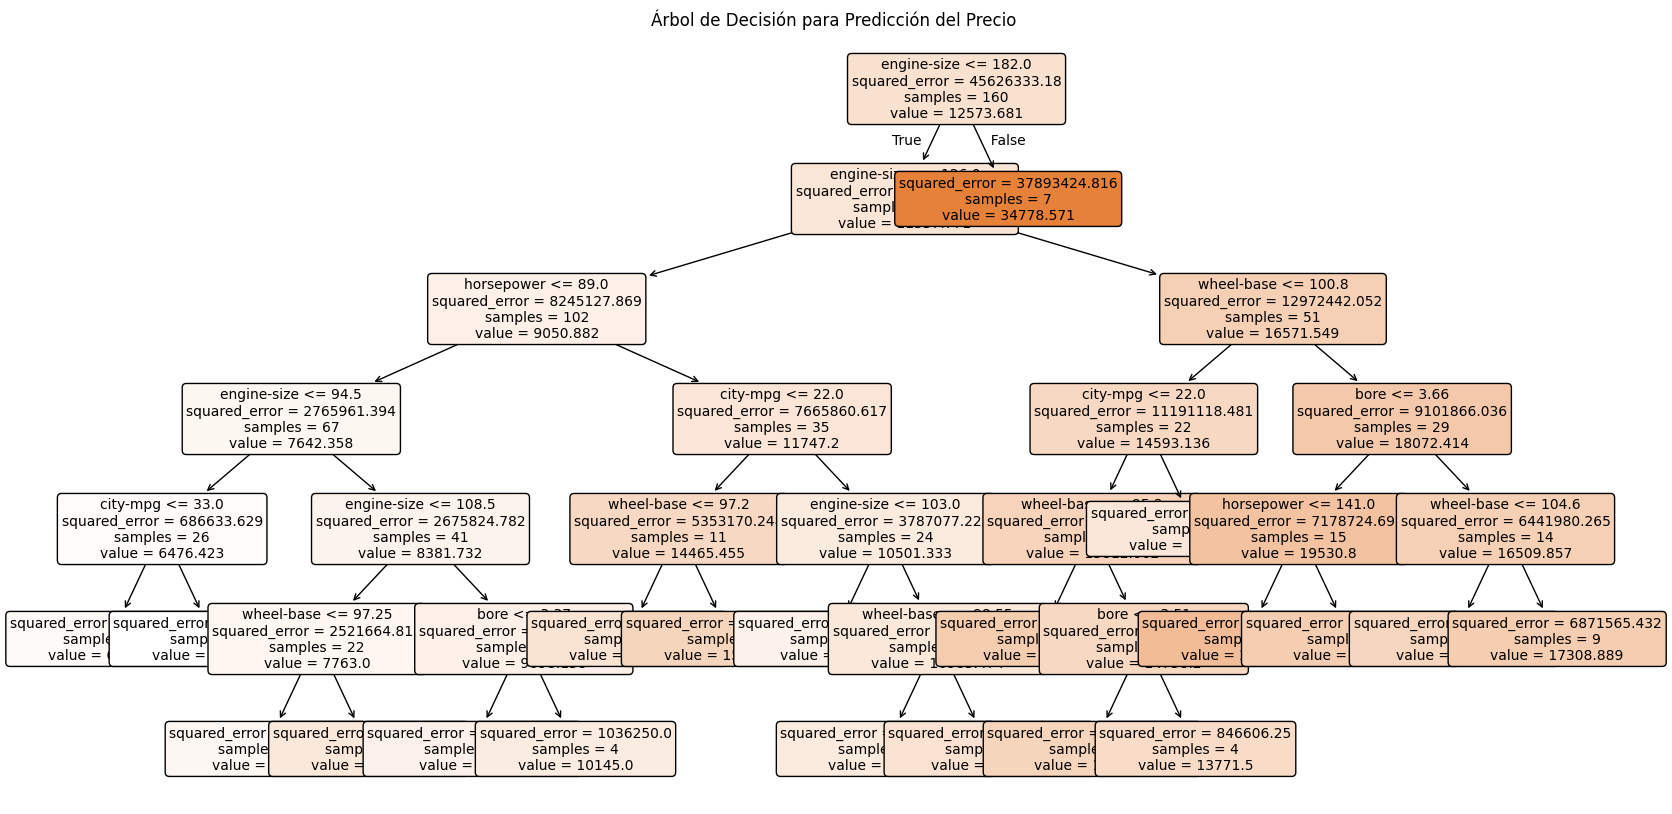

In [24]:
# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(tree_model,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Árbol de Decisión para Predicción del Precio")
plt.show()